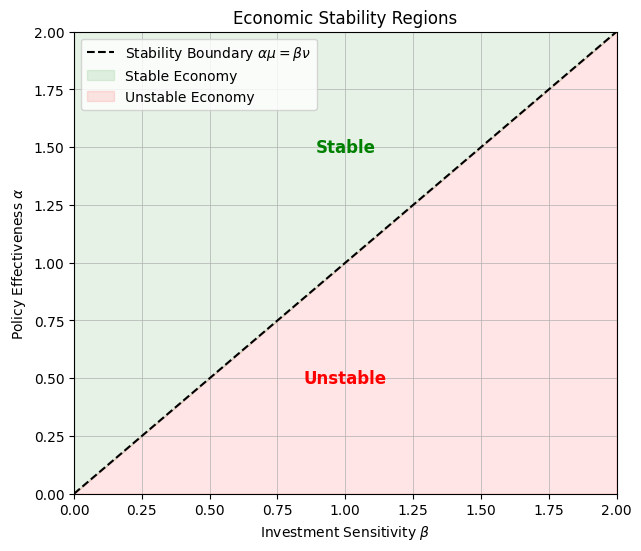

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for β (Investment Sensitivity)
beta = np.linspace(0, 2, 400)

# Define the stability boundary: α = β * (ν/μ)
# For simplicity, assume ν/μ = 1 → α = β
alpha_boundary = beta

# Create the plot
plt.figure(figsize=(7, 6))

# Plot the stability boundary
plt.plot(beta, alpha_boundary, 'k--', label=r'Stability Boundary $\alpha\mu = \beta\nu$')

# Fill the stable and unstable regions
plt.fill_between(beta, alpha_boundary, 2, color='green', alpha=0.1, label='Stable Economy')
plt.fill_between(beta, 0, alpha_boundary, color='red', alpha=0.1, label='Unstable Economy')

# --- Compute approximate centers for text placement ---

# Stable region: roughly a triangle with vertices at (0,0), (2,2), (2,2) — wait, actually:
# It's bounded by: x from 0 to 2, y from α_boundary to 2.
# Approximate centroid: average of left, right, top points
# Left-top: (0, 2), Right-top: (2, 2), Bottom: (1, 1) — but better to take midpoint of region

# Simple heuristic: for stable region, use (mean_beta, mean_alpha_above_boundary)
mid_beta_stable = np.mean(beta)
mid_alpha_stable = np.mean(alpha_boundary + (2 - alpha_boundary)/2)  # halfway between boundary and top

# For unstable region: halfway between 0 and boundary
mid_alpha_unstable = np.mean(alpha_boundary / 2)

# Place text at computed centers
plt.text(mid_beta_stable, mid_alpha_stable, 'Stable', color='green', fontsize=12, ha='center', va='center', fontweight='bold')
plt.text(mid_beta_stable, mid_alpha_unstable, 'Unstable', color='red', fontsize=12, ha='center', va='center', fontweight='bold')

# Set axis labels and title
plt.xlabel(r'Investment Sensitivity $\beta$')
plt.ylabel(r'Policy Effectiveness $\alpha$')
plt.title('Economic Stability Regions')

# Set axis limits
plt.xlim(0, 2)
plt.ylim(0, 2)

# Add legend
plt.legend(loc='upper left')

# Show grid
plt.grid(True, linestyle='-', linewidth=0.5)

# Display the plot
plt.show()

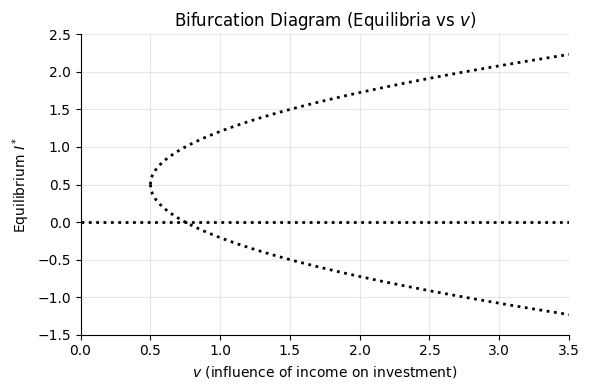

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Critical value where bifurcation occurs
v_c = 0.5

# v values from just above v_c to 3.5
v = np.linspace(v_c, 3.5, 400)

# Non-zero equilibria: typical saddle-node shape (square root)
I_upper = np.sqrt(v - v_c) + 0.5          # shifted up to match image
I_lower = -np.sqrt(v - v_c) + 0.5         # lower branch, also above zero near start

# Ensure lower branch doesn't go too negative (clip if needed, but image shows it dips below zero slightly)
# In your image, lower branch goes slightly negative, so we keep it.

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the two non-trivial equilibria as dotted lines
plt.plot(v, I_upper, 'k:', linewidth=2)
plt.plot(v, I_lower, 'k:', linewidth=2)

# Plot the trivial equilibrium I* = 0 for all v
v_full = np.linspace(0, 3.5, 100)
plt.plot(v_full, np.zeros_like(v_full), 'k:', linewidth=2)

# Labels
plt.xlabel(r'$v$ (influence of income on investment)')
plt.ylabel(r'Equilibrium $I^*$')
plt.title('Bifurcation Diagram (Equilibria vs $v$)')

# Axes
plt.xlim(0, 3.5)
plt.ylim(-1.5, 2.5)
plt.grid(True, linestyle='-', alpha=0.3)

# Hide top and right spines for clean look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()